Agung Kurniawan
223307002/5A

In [2]:
#eksplorasi data
import pandas as pd
train = pd.read_csv('data/train.csv')
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


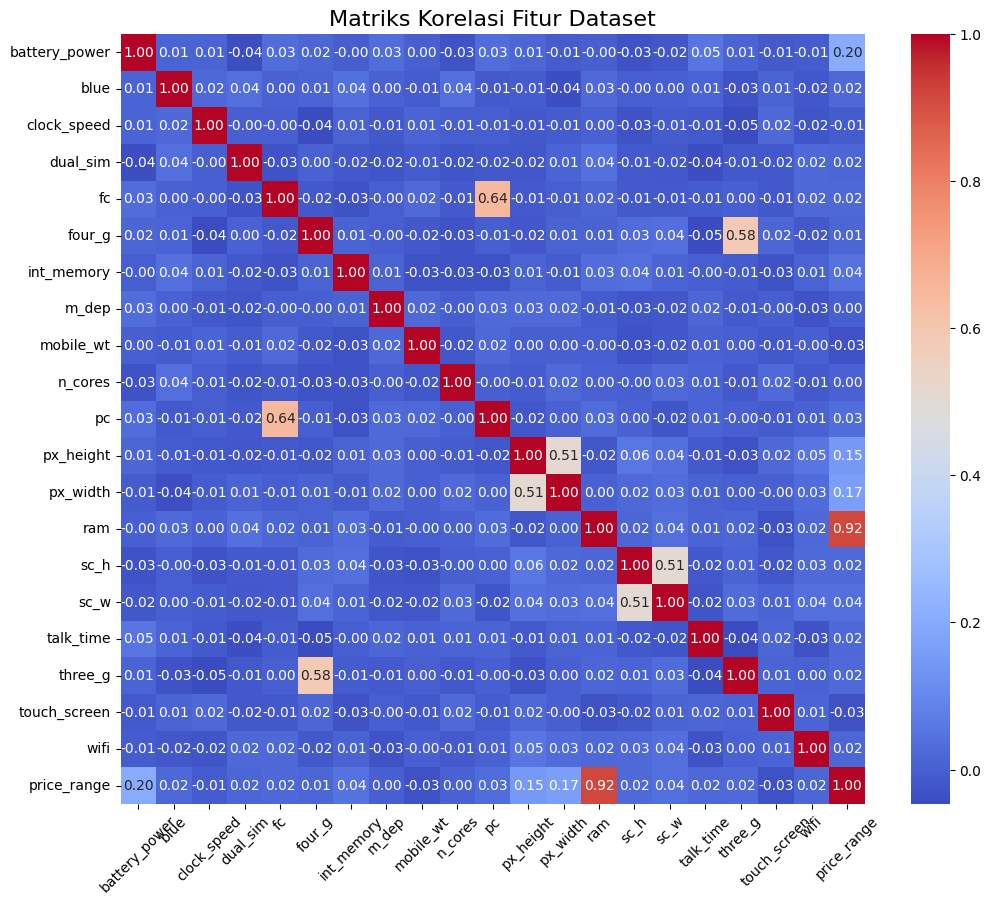

In [3]:
#visualisasi
#memilih data numerik
numeric_data = train.select_dtypes(include=['float64', 'int64'])

#menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Menentukan ukuran figur
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi Fitur Dataset', fontsize=16)  # Judul heatmap
plt.xticks(rotation=45)  # Memiringkan label kolom untuk keterbacaan
plt.yticks(rotation=0)  # Meluruskan label baris
plt.show()

In [4]:
#menampilkan beberapa baris pertama dan informasi kolom untuk memahami dataset
train.head(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
 0            842     0          2.2         0   1       0           7    0.6   
 1           1021     1          0.5         1   0       1          53    0.7   
 2            563     1          0.5         1   2       1          41    0.9   
 3            615     1          2.5         0   0       0          10    0.8   
 4           1821     1          1.2         0  13       1          44    0.6   
 
    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
 0        188        2  ...         20       756  2549     9     7         19   
 1        136        3  ...        905      1988  2631    17     3          7   
 2        145        5  ...       1263      1716  2603    11     2          9   
 3        131        6  ...       1216      1786  2769    16     8         11   
 4        141        2  ...       1208      1212  1411     8     2         15   
 
    three_g  touch_scree

In [5]:
#pilih fitur
X = train[['battery_power', 'ram', 'px_height', 'px_width', 'int_memory']]
y = train['price_range']


In [6]:
#modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#normalisasi data fitur untuk mempercepat konvergensi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#membagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#model Logistic Regression dengan iterasi lebih banyak
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)

#evaluasi model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9725
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.95      1.00      0.97        91
           2       0.96      0.95      0.95        92
           3       0.98      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



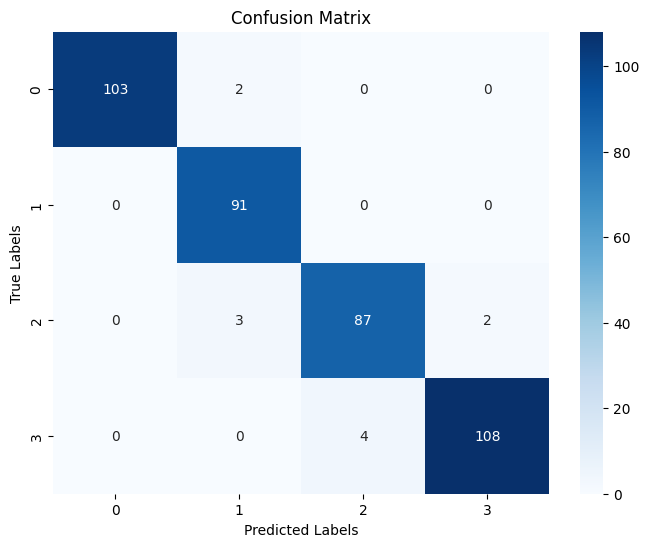

In [7]:
#evaluasi model
#membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
import joblib
joblib.dump(model, 'mobile_price_model.pkl')
joblib.dump(scaler, 'mobile_price_scaler.pkl') 

['mobile_price_scaler.pkl']